In [1]:
import cv2
import numpy as np
import torch
import torchvision
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import datasets
import utils

In [2]:
data = datasets.TDSCForClassification()
print(len(data))

3170


(280, 510)
(45, 224, 224)


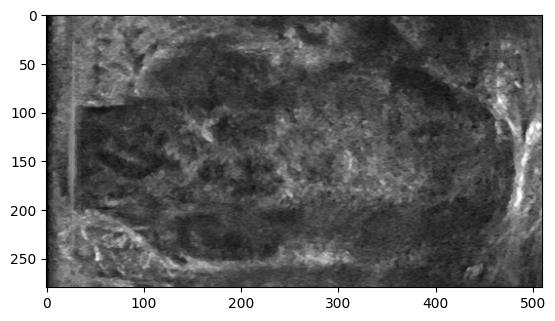

In [3]:
x, _, _ = data[100]
plt.imshow(x, cmap="gray")
print(x.shape)
print(utils.image.subsample_image(x, stride=20).shape)

In [7]:
target_size = (224,224)
cnt = 0
for x, _, y in data:
    w, h = x.shape
    if w < 224 and h < 224:
        x = utils.image.zero_pad_resize(x, size=target_size)
        cv2.imwrite(f"./data/tdsc/classification_with_subsampling/{int(y)}/{cnt}.png", x)
        cnt += 1
    else:
        xs = utils.image.subsample_image(x, size=target_size, stride=10)
        l = xs.shape[0]
        for i in range(xs.shape[0]):
            cv2.imwrite(f"./data/tdsc/classification_with_subsampling/{int(y)}/{cnt}.png", xs[i,:,:])
            cnt += 1
        # save xs and ms

In [2]:
data = datasets.TDSCForClassificationWithSub()
print(len(data))

13727
